<a href="https://colab.research.google.com/github/EMAL1234/Main_Project8/blob/main/Copy_of_Mental_Health_Random_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle

In [ ]:
path='/content/drive/MyDrive/survey.csv'
data=pd.read_csv(path)
data.head(5)
data=data.drop('no_employees',axis=1)

In [ ]:
data.dropna()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,2014-08-27 11:36:48,33,male,United States,CA,No,Yes,Yes,Rarely,No,...,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,2014-08-27 11:37:08,35,male,United States,TN,No,Yes,Yes,Sometimes,No,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
33,2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,Yes,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
45,2014-08-27 11:43:36,38,Female,United States,TX,No,Yes,Yes,Sometimes,No,...,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
49,2014-08-27 11:44:43,30,male,United States,IL,No,Yes,Yes,Rarely,No,...,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2014-11-06 11:24:38,56,female,United States,OR,Yes,No,No,Rarely,Yes,...,Don't know,Maybe,Maybe,No,No,No,No,Don't know,No,I'm self-employed on contract with small start...
1190,2015-01-03 03:38:30,44,M,United States,OH,No,Yes,Yes,Sometimes,No,...,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,My mental health issues were the direct result...
1219,2015-02-21 09:48:13,38,Male,United States,TX,No,No,Yes,Sometimes,Yes,...,Very easy,No,No,Yes,Yes,No,No,Don't know,No,I openly discuss my mental health struggles. I...
1221,2015-02-21 10:45:51,46,male,United States,MD,No,Yes,Yes,Sometimes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Just starting a new job hence the numerous I d...


In [ ]:
data.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [ ]:
data['self_employed'].fillna('No',inplace=True)

In [ ]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

<Axes: >

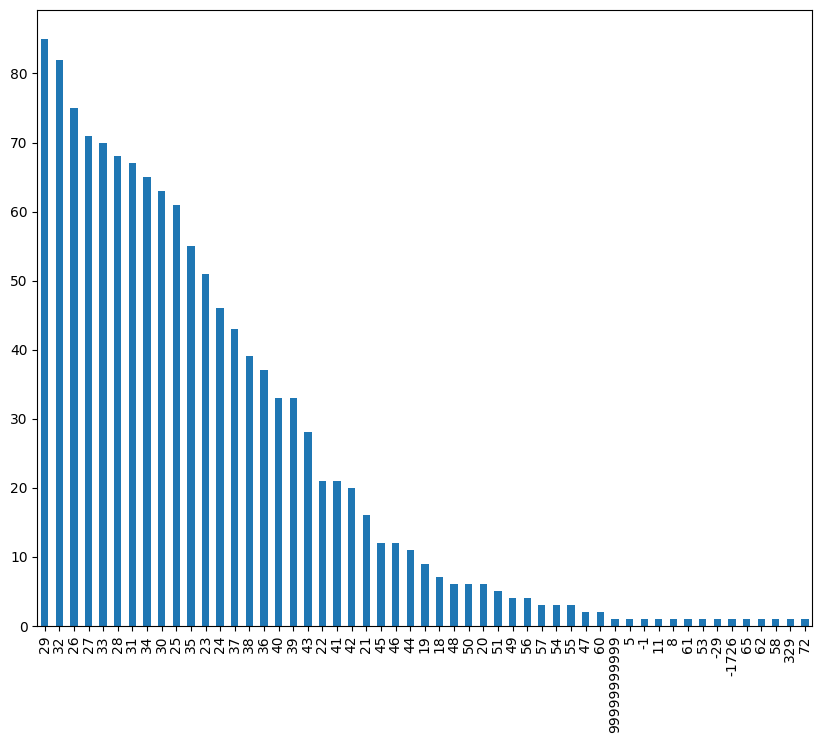

In [ ]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [ ]:
data['work_interfere'].fillna('N/A',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1259 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             1259 non-null   object
 6   remote_work                1259 non-null   object
 7   tech_company               1259 non-null   object
 8   benefits                   1259 non-null   object
 9   care_options               1259 non-null   object
 10  wellness_program           1259 non-null   object
 11  seek_help                  1259 non-null   object
 12  anonymity                  1259 non-null   object
 13  leave                      1259 non-null   object
 14  mental_h

In [ ]:
data.drop(data[(data['Age']>60)| (data['Age']<18)].index,inplace=True)

In [ ]:
data['Gender'].replace(['Male','male','M','m','Male','Cis Male',
'Man','cis male','Mail','Male-ish','Male(CIS)','Cis Man','msle','Malr','Mal','maile','Make',],'Male',inplace=True)

data['Gender'].replace(['Female','female','F','f','Woman','Female',
'femail','cis Female','cis-female/fenne','Femake','Female(cis)','woman',],'Female',inplace=True)

data['Gender'].replace(['Female (trans)','queer/she/they','non-binary','fluid','queer','Trans-female',
'femail','cis Female','cis-female/fenne','Femake','Female(cis)','woman',],'Non-Bianry',inplace=True)
 

In [ ]:
data.dropna()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,N/A,No,Yes,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,Yes,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,No,Yes,Yes,Sometimes,No,Yes,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,No,No,No,N/A,Yes,Yes,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [ ]:
dupes=data.duplicated()
sum(dupes)

4

In [ ]:
x=data.drop('treatment', axis=1)
y= data['treatment']

In [ ]:
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import LabelEncoder,OrdinalEncoder

In [ ]:
x=data.drop('treatment', axis=1)
y= data['treatment']

In [ ]:
ct= ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history',
'work_interfere','remote_work','tech_company','benefits','care_options','wellness_program','seek_help',
'anonymity','leave','mental_health_consequence','phys_health_consequence',
'coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])])

In [ ]:
print(ct)

ColumnTransformer(transformers=[('oe', OrdinalEncoder(),
                                 ['Gender', 'self_employed', 'family_history',
                                  'work_interfere', 'remote_work',
                                  'tech_company', 'benefits', 'care_options',
                                  'wellness_program', 'seek_help', 'anonymity',
                                  'leave', 'mental_health_consequence',
                                  'phys_health_consequence', 'coworkers',
                                  'supervisor', 'mental_health_interview',
                                  'phys_health_interview', 'mental_vs_physical',
                                  'obs_consequence'])])


In [ ]:
x=ct.fit_transform(x)

In [ ]:
ct.get_feature_names_out()

array(['oe__Gender', 'oe__self_employed', 'oe__family_history',
       'oe__work_interfere', 'oe__remote_work', 'oe__tech_company',
       'oe__benefits', 'oe__care_options', 'oe__wellness_program',
       'oe__seek_help', 'oe__anonymity', 'oe__leave',
       'oe__mental_health_consequence', 'oe__phys_health_consequence',
       'oe__coworkers', 'oe__supervisor', 'oe__mental_health_interview',
       'oe__phys_health_interview', 'oe__mental_vs_physical',
       'oe__obs_consequence'], dtype=object)

In [ ]:
print(x)

[[4. 0. 0. ... 0. 2. 0.]
 [9. 0. 0. ... 1. 0. 0.]
 [9. 0. 0. ... 2. 1. 0.]
 ...
 [9. 0. 1. ... 1. 1. 0.]
 [4. 0. 0. ... 1. 1. 0.]
 [9. 0. 1. ... 1. 0. 0.]]


In [ ]:
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
print(y)

[1 0 0 ... 1 0 1]


In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=49)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((872, 20), (375, 20), (872,), (375,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report,auc


In [ ]:
model_dict={}
model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=49)
model_dict['KNN']=KNeighborsClassifier()
model_dict['Decision Tree']=DecisionTreeClassifier(random_state=49)
model_dict['Random Forest']=RandomForestClassifier(random_state=49)
model_dict['AdaBoost']=AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting']=GradientBoostingClassifier(random_state=49)
model_dict['XGB']=XGBClassifier(random_state=49)

In [ ]:
def model_test(x_train,x_test,y_train,y_test,model,model_name):
  model.fit(x_train,y_train)
  y_pred=model_predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print('==============================================='.format(model_name))
  print('score is:{}'.format(accuracy))
  print()

In [ ]:
abc=LogisticRegression(random_state=99)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print('Accurancy of LogisticRegression',accuracy_score(y_test,pred_abc))

Accurancy of LogisticRegression 0.8426666666666667


In [ ]:
abc=AdaBoostClassifier(random_state=99)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print('Accurancy of AdaBoost',accuracy_score(y_test,pred_abc))

Accurancy of AdaBoost 0.8666666666666667


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators':[int (x) for x in np.linspace(start = 1,stop = 50,num = 15)],
            'learning_rate':[(0.97 + x/100) for x in range(0,8)],}
abc_random=RandomizedSearchCV(random_state=49,estimator=abc,param_distributions=params_abc,n_iter=50,cv=5,n_jobs=-1)

In [ ]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [ ]:
abc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [ ]:
abc_random.best_params_

{'n_estimators': 25, 'learning_rate': 1.01}

In [ ]:
abc_tuned=AdaBoostClassifier(random_state=49,n_estimators=11,learning_rate=1.02)
abc_tuned.fit(x_train,y_train)
pred_abc_tuned=abc_tuned.predict(x_test)
print('Accurancy of AdaBoost(tuned)=',accuracy_score(y_test,pred_abc_tuned))

Accurancy of AdaBoost(tuned)= 0.872


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)

knn_train_accuracy=accuracy_score(y_train,y_train_pred)
knn_train_mcc=matthews_corrcoef(y_train,y_train_pred)
knn_train_f1=f1_score(y_train,y_train_pred,average='weighted')

knn_test_accuracy=accuracy_score(y_test,y_test_pred)
knn_test_mcc=matthews_corrcoef(y_test,y_test_pred)
knn_test_f1=f1_score(y_test,y_test_pred,average='weighted')


print("training set")
print("accurancy %s",knn_train_accuracy)
print("mcc %s",knn_train_mcc)
print("f1 score %s",knn_train_f1)

print("test set")
print("accurancy %s",knn_test_accuracy)
print("mcc %s",knn_test_mcc)
print("f1 score %s",knn_test_f1)


training set
accurancy %s 0.8589449541284404
mcc %s 0.7181670154754978
f1 score %s 0.8588753325218494
test set
accurancy %s 0.7653333333333333
mcc %s 0.5315928492085357
f1 score %s 0.7652164807648532


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(alpha=1,max_iter=1000)
mlp.fit(x_train,y_train)

y_train_pred=mlp.predict(x_train)
y_test_pred=mlp.predict(x_test)

mlp_train_accuracy=accuracy_score(y_train,y_train_pred)
mlp_train_mcc=matthews_corrcoef(y_train,y_train_pred)
mlp_train_f1=f1_score(y_train,y_train_pred,average='weighted')

mlp_test_accuracy=accuracy_score(y_test,y_test_pred)
mlp_test_mcc=matthews_corrcoef(y_test,y_test_pred)
mlp_test_f1=f1_score(y_test,y_test_pred,average='weighted')



print("training set")
print("accurancy %s",mlp_train_accuracy)
print("mcc %s",mlp_train_mcc)
print("f1 score %s",mlp_train_f1)

print("test set")
print("accurancy %s",mlp_test_accuracy)
print("mcc %s",mlp_test_mcc)
print("f1 score %s",mlp_test_f1)

training set
accurancy %s 0.8371559633027523
mcc %s 0.6815866096541671
f1 score %s 0.8360735129602256
test set
accurancy %s 0.8693333333333333
mcc %s 0.741519159710272
f1 score %s 0.8690165091816722


In [ ]:
from sklearn.svm import SVC

svm_rbf=SVC(gamma=2,C=1)
svm_rbf.fit(x_train,y_train)
y_train_pred=svm_rbf.predict(x_train)
y_test_pred=svm_rbf.predict(x_test)

svm_rbf_train_accuracy=accuracy_score(y_train,y_train_pred)
svm_rbf_train_mcc=matthews_corrcoef(y_train,y_train_pred)
svm_rbf_train_f1=f1_score(y_train,y_train_pred,average='weighted')

svm_rbf_test_accuracy=accuracy_score(y_test,y_test_pred)
svm_rbf_test_mcc=matthews_corrcoef(y_test,y_test_pred)
svm_rbf_test_f1=f1_score(y_test,y_test_pred,average='weighted')


print("training set")
print("accurancy %s",svm_rbf_train_accuracy)
print("mcc %s",svm_rbf_train_mcc)
print("f1 score %s",svm_rbf_train_f1)

print("training set")
print("accurancy %s",svm_rbf_test_accuracy)
print("mcc %s",svm_rbf_test_mcc)
print("f1 score %s",svm_rbf_test_f1)




training set
accurancy %s 1.0
mcc %s 1.0
f1 score %s 1.0
training set
accurancy %s 0.5786666666666667
mcc %s 0.2775929392371407
f1 score %s 0.48806158967956725


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

rf_train_accuracy=accuracy_score(y_train,y_train_pred)
rf_train_mcc=matthews_corrcoef(y_train,y_train_pred)
rf_train_f1=f1_score(y_train,y_train_pred, average='weighted')

rf_test_accuracy=accuracy_score(y_test,y_test_pred)
rf_test_mcc=matthews_corrcoef(y_test,y_test_pred)
rf_test_f1=f1_score(y_test,y_test_pred ,average='weighted')


print("model performance of training set")
print("accurancy %s",rf_train_accuracy)
print("mcc %s",rf_train_mcc)
print("f1 score %s",rf_train_f1)

print("test set")
print("accurancy %s",rf_test_accuracy)
print("mcc %s",rf_test_mcc)
print("f1 score %s",rf_test_f1)

                       



model performance of training set
accurancy %s 0.9896788990825688
mcc %s 0.9793798990644919
f1 score %s 0.9896791841452312
test set
accurancy %s 0.824
mcc %s 0.648687985787306
f1 score %s 0.8239499288762446


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

y_train_pred=dt.predict(x_train)
y_test_pred=dt.predict(x_test)


dt_train_accuracy=accuracy_score(y_train,y_train_pred)
dt_train_mcc=matthews_corrcoef(y_train,y_train_pred)
dt_train_f1=f1_score(y_train,y_train_pred,average='weighted')

dt_test_accuracy=accuracy_score(y_test,y_test_pred)
dt_test_mcc=matthews_corrcoef(y_test,y_test_pred)
dt_test_f1=f1_score(y_test,y_test_pred,average='weighted')

print('model performance for training set')
print('Accuracy:%s',dt_train_accuracy)
print('MCC%s',dt_train_mcc)
print('f1_score%s',dt_train_f1)


print('model performance for test set')
print('Accuracy:%s',dt_test_accuracy)
print('MCC%s',dt_test_mcc)
print('f1_score%s',dt_test_f1)

model performance for training set
Accuracy:%s 0.8256880733944955
MCC%s 0.6515933519579525
f1_score%s 0.8256880733944955
model performance for test set
Accuracy:%s 0.8426666666666667
MCC%s 0.6856240645204054
f1_score%s 0.8426554782002689


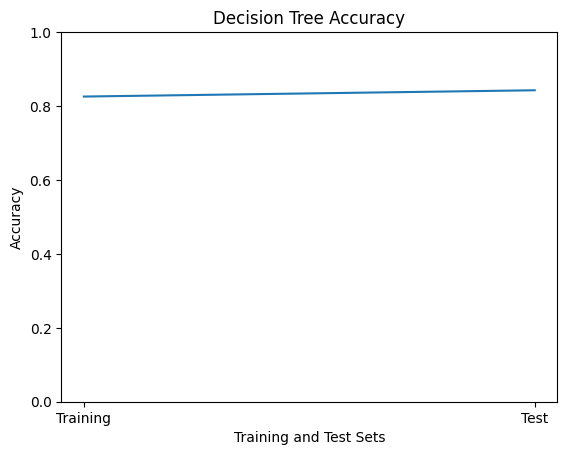

In [ ]:
# Create lists of accuracy scores for both training and test sets
accuracy_scores = [dt_train_accuracy, dt_test_accuracy]

# Create a line graph of the accuracy scores
plt.plot(accuracy_scores)
plt.title('Decision Tree Accuracy')
plt.xlabel('Training and Test Sets')
plt.ylabel('Accuracy')
plt.xticks([0, 1], ['Training', 'Test'])
plt.ylim([0.0, 1.0])
plt.show()









In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators=[('knn',knn),('mlp',mlp),('rf',rf)]

stack_model=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

stack_model.fit(x_train,y_train)

y_train_pred=stack_model.predict(x_train)
y_test_pred=stack_model.predict(x_test)

stack_model__train_accuracy=accuracy_score(y_train,y_train_pred)
stack_model__train_mcc=matthews_corrcoef(y_train,y_train_pred)
stack_model_train_f1=f1_score(y_train,y_train_pred,average='weighted')

stack_model__test_accuracy=accuracy_score(y_test,y_test_pred)
stack_model__test_mcc=matthews_corrcoef(y_test,y_test_pred)
stack_model_test_f1=f1_score(y_test,y_test_pred,average='weighted')


print("training set")
print("accurancy %s",stack_model__train_accuracy)
print("mcc %s",stack_model__train_mcc)
print("f1 score %s",stack_model_train_f1)

print("test set")
print("accurancy %s",stack_model__test_accuracy)
print("mcc %s",stack_model__test_mcc)
print("f1 score %s",stack_model_test_f1)




training set
accurancy %s 0.9094036697247706
mcc %s 0.8204653282809894
f1 score %s 0.9092686460781555
test set
accurancy %s 0.848
mcc %s 0.6960307526556867
f1 score %s 0.8479805390179885


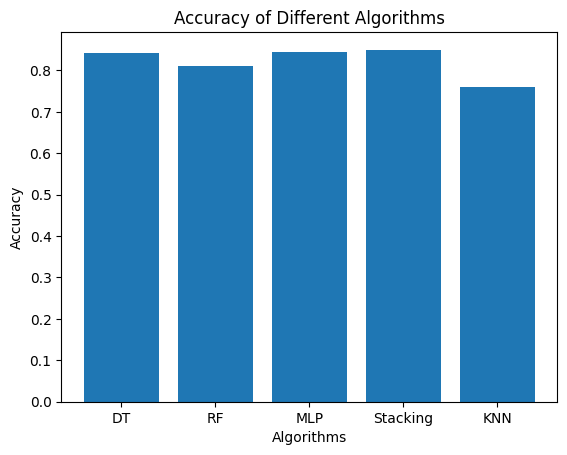

In [ ]:
algorithm_names = ['DT', 'RF','MLP', 'Stacking','KNN']
accuracies = [0.843, 0.81, 0.845, 0.85,0.76]
plt.bar(algorithm_names, accuracies)
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()


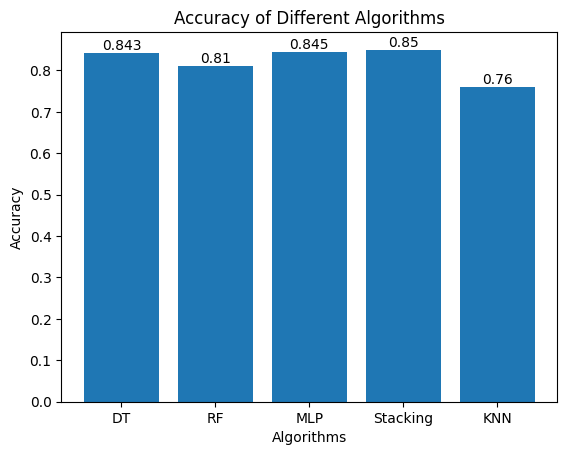

In [ ]:
import matplotlib.pyplot as plt

algorithm_names = ['DT', 'RF', 'MLP', 'Stacking', 'KNN']
accuracies = [0.843, 0.81, 0.845, 0.85, 0.76]

plt.bar(algorithm_names, accuracies)
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

# Add accuracy values on top of each bar
for i in range(len(algorithm_names)):
    plt.text(i, accuracies[i], str(accuracies[i]), ha='center', va='bottom')

plt.show()


In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=d6cbb6dfc377d4e6094cbf36215d4982c754542bbaa28ed3cfc9fb1e057b81f6
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server

In [ ]:
 anvil.server.connect("server_5BMIWF6QEXTIAJ7VGQUUP3MQ-I36IBZQWPO7TLCXL")


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


In [ ]:
data.iloc[3]

Age                                          31
Gender                                     Male
self_employed                                No
family_history                              Yes
treatment                                   Yes
work_interfere                            Often
remote_work                                  No
tech_company                                Yes
benefits                                     No
care_options                                Yes
wellness_program                             No
seek_help                                    No
anonymity                                    No
leave                        Somewhat difficult
mental_health_consequence                   Yes
phys_health_consequence                     Yes
coworkers                          Some of them
supervisor                                   No
mental_health_interview                   Maybe
phys_health_interview                     Maybe
mental_vs_physical                      

In [ ]:
@anvil.server.callable
def submit_form(text_box_1, drop_down_1,drop_down_2, drop_down_3,drop_down_4,drop_down_5,drop_down_6,drop_down_7,
                drop_down_8,drop_down_9,drop_down_10,drop_down_11,drop_down_12,drop_down_13,drop_down_14,
                drop_down_15,drop_down_16,drop_down_17,drop_down_20,drop_down_18,drop_down_19):
  
  # arr = np.array([[text_box_1, drop_down_1, drop_down_2,]])
  
 # print(text_box_1)
 # print(drop_down_11)
  # classification=stack_model.predict(arr)
  # return treatment[classification][0]
  arr = np.array([drop_down_1,drop_down_2, drop_down_3,drop_down_4,drop_down_5,drop_down_6,drop_down_7,
                drop_down_8,drop_down_9,drop_down_10,drop_down_11,drop_down_12,drop_down_13,drop_down_14,
                drop_down_15,drop_down_16,drop_down_17,drop_down_20,drop_down_18,drop_down_19]).reshape(1, -1)


  arr=pd.DataFrame(data=arr, index=np.arange(len(arr)), columns=['Gender','self_employed','family_history',
  'work_interfere','remote_work','tech_company','benefits','care_options','wellness_program','seek_help',
  'anonymity','leave','mental_health_consequence','phys_health_consequence',
  'coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])
  arr.shape
  actual_input=ct.transform(arr)
  print(actual_input)
  #inserting age into input
  np.insert(actual_input, 0, text_box_1)
  classification=stack_model.predict(actual_input)
  print(classification[0])
  return classification[0]


In [ ]:
anvil.server.wait_forever()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
ct.get_feature_names_out()

In [ ]:
arr = np.array(['Male','No','Yes','Often','No','Yes','No','Yes','No','No','No','Somewhat difficult','Yes','Yes','Some of them','No','Maybe','Maybe','No','No']).reshape(1, -1)

# pipeline = Pipeline(steps=[('ct', ct),
#                            ('model', stack_model)])
arr=pd.DataFrame(data=arr, index=np.arange(len(arr)), columns=['Gender','self_employed','family_history',
'work_interfere','remote_work','tech_company','benefits','care_options','wellness_program','seek_help',
'anonymity','leave','mental_health_consequence','phys_health_consequence',
'coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])
arr.shape
actual_input=ct.transform(arr)
print(actual_input)
#inserting age into input
np.insert(actual_input, 0, 31)
classification=stack_model.predict(actual_input)
classification[0]

In [ ]:
arr = np.array(['Male','Yes','Yes','Never','Yes','Yes','No','No','Yes','No','Yes','Somewhat easy','No','No','Some of them','Some of them','Maybe','Maybe','Don\'t know','No']).reshape(1, -1)

#pipeline = Pipeline(steps=[('ct', ct),
 #                         ('model', stack_model)])
arr=pd.DataFrame(data=arr, index=np.arange(len(arr)), columns=['Gender','self_employed','family_history',
'work_interfere','remote_work','tech_company','benefits','care_options','wellness_program','seek_help',
'anonymity','leave','mental_health_consequence','phys_health_consequence',
'coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])
arr.shape
actual_input=ct.transform(arr)
print(actual_input)
#inserting age into input
np.insert(actual_input, 0, 36)
classification=stack_model.predict(actual_input)
classification[0]